In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
income=pd.read_csv('income.csv')
income.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# PERFORMING EDA

In [3]:
#creating a data frame
income=pd.DataFrame(income)

In [4]:
income.shape
#32560 rows and 15 columns

(32560, 15)

In [5]:
income
#some of the columns have data missing or irrelevant input

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
#data needs to be normalised,and the data is combination of numeric & categorical data, hence we need to label encode it
#this is a logistic regression problem

In [7]:
#to find the type of the dataset
type(income)

#the dataset type is data frame

pandas.core.frame.DataFrame

In [8]:
income.info()
#It gives the information about the data that there are total 32560 rows and 15 columns.
#The data types used are int64, float64 & object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
#checking for null values
income.isnull().sum()
#there are no null values in the columns

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [10]:
#in the columns we can see the "?", we can replace it with a value - "Not Given"
income['Workclass'] = income['Workclass'].replace(to_replace='?', value='Not Given')
income['Occupation'] = income['Occupation'].replace(to_replace='?', value='Not Given')
income['Native_country'] = income['Native_country'].replace(to_replace='?', value='Not Given')
income.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [11]:
#using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
columns= ["Workclass", "Education", "Marital_status", "Occupation", "Relationship", "Race", "Sex", "Native_country", "Income"]
for i in columns:
    income[i] = le.fit_transform(income[i])

In [13]:
income.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [14]:
income.shape

(32560, 15)

<AxesSubplot:>

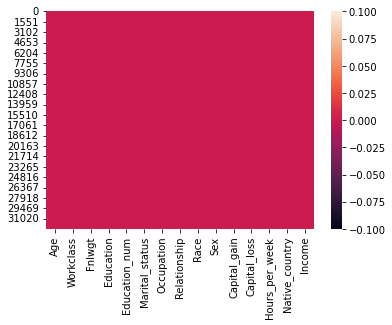

In [15]:
#plotting null values via graph
sns.heatmap(income.isnull())

#there are no null values

In [16]:
income.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [17]:
#Finding correlation values
income.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


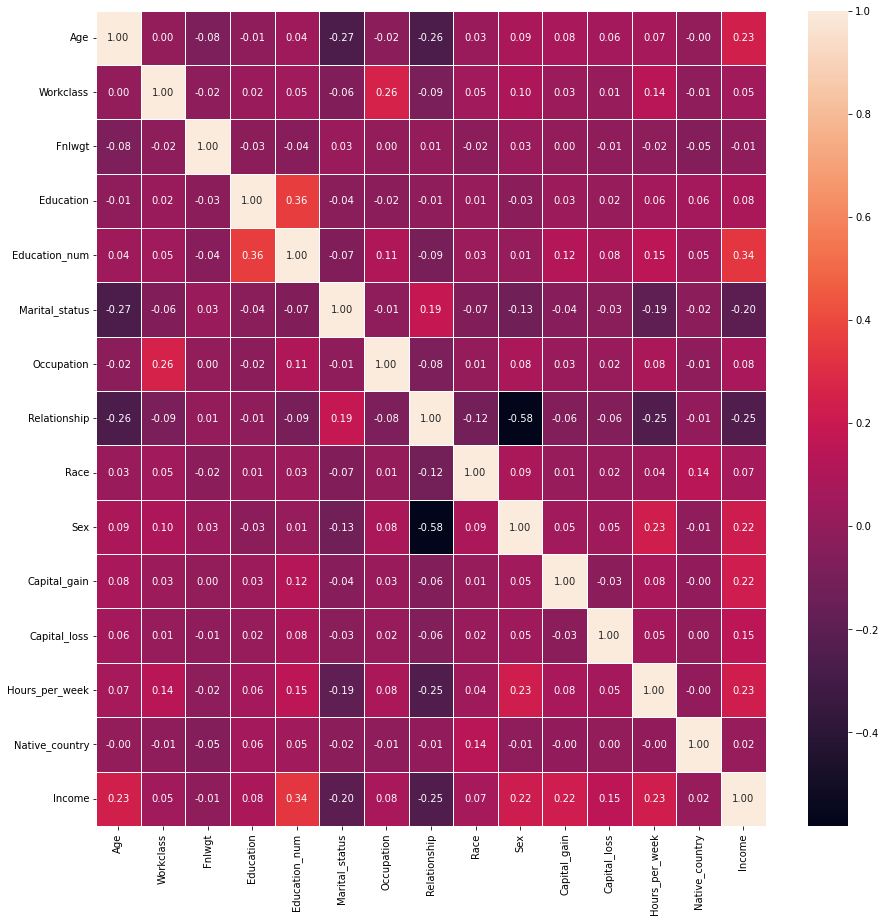

In [18]:
#heatmap for correlation
corr_hmap= income.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_hmap, annot=True, linewidths=0.9, linecolor="white", fmt='.2f')
plt.show()

In [19]:
#making correlation matrix with 'Income'
corr_matrix= income.corr()
corr_matrix['Income'].sort_values(ascending=False)

#the highest correlation with the target variable is of following columns:
#Education_num     0.335182
#Relationship     -0.250924
#Age               0.234039
#Hours_per_week    0.229690

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

In [20]:
income.shape

(32560, 15)

Age                  AxesSubplot(0.125,0.749828;0.227941x0.130172)
Workclass         AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Fnlwgt            AxesSubplot(0.672059,0.749828;0.227941x0.130172)
Education            AxesSubplot(0.125,0.593621;0.227941x0.130172)
Education_num     AxesSubplot(0.398529,0.593621;0.227941x0.130172)
Marital_status    AxesSubplot(0.672059,0.593621;0.227941x0.130172)
Occupation           AxesSubplot(0.125,0.437414;0.227941x0.130172)
Relationship      AxesSubplot(0.398529,0.437414;0.227941x0.130172)
Race              AxesSubplot(0.672059,0.437414;0.227941x0.130172)
Sex                  AxesSubplot(0.125,0.281207;0.227941x0.130172)
Capital_gain      AxesSubplot(0.398529,0.281207;0.227941x0.130172)
Capital_loss      AxesSubplot(0.672059,0.281207;0.227941x0.130172)
Hours_per_week          AxesSubplot(0.125,0.125;0.227941x0.130172)
Native_country       AxesSubplot(0.398529,0.125;0.227941x0.130172)
Income               AxesSubplot(0.672059,0.125;0.227941x0.130

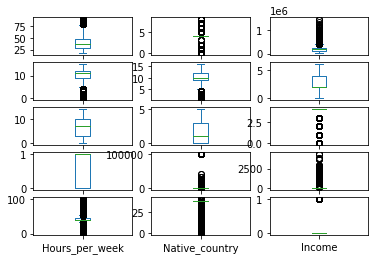

In [21]:
#checking for outliers
#plotting the plot all together
income.plot(kind='box', subplots=True, layout=(5,3))

In [22]:
#Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(income))
z.shape

(32560, 15)

In [23]:
threshold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [24]:
#total number of outliers presnt are:
len(np.where(z>3)[0])

#there are total 5667 outliers present- not much outliers

5667

In [25]:
#dropping the outliers
income_new =income[(z<3).all(axis=1)]
income_new.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
6,52,6,209642,11,9,2,4,0,4,1,0,0,45,39,1
7,31,4,45781,12,14,4,10,1,4,0,14084,0,50,39,1
8,42,4,159449,9,13,2,4,0,4,1,5178,0,40,39,1
11,23,4,122272,9,13,4,1,3,4,0,0,0,30,39,0
12,32,4,205019,7,12,4,12,1,2,1,0,0,50,39,0


In [26]:
print("old data frame ", income.shape)
print("new data frame ", income_new.shape)
print("total dropped rows ", income.shape[0]- income_new.shape[0])

old data frame  (32560, 15)
new data frame  (27417, 15)
total dropped rows  5143


In [27]:
#data loss percent
loss_percent = ((32560-27417)/32560)*100
loss_percent

#15.79 % data is removed after removing outliers

15.795454545454547

In [28]:
#checking for skewness
income_new.skew().sort_values(ascending=False)

#the maximum skewness in present in columns:
#Capital_loss      29.325736
#Capital_gain       4.934878
#Income             1.324919
#Race              -2.592931
#Native_country    -5.460675

Capital_loss      29.325736
Capital_gain       4.934878
Income             1.324919
Relationship       0.750207
Fnlwgt             0.626221
Age                0.483478
Occupation         0.131148
Marital_status    -0.044317
Education_num     -0.143960
Hours_per_week    -0.358396
Sex               -0.684115
Workclass         -0.738023
Education         -0.957458
Race              -2.592931
Native_country    -5.460675
dtype: float64

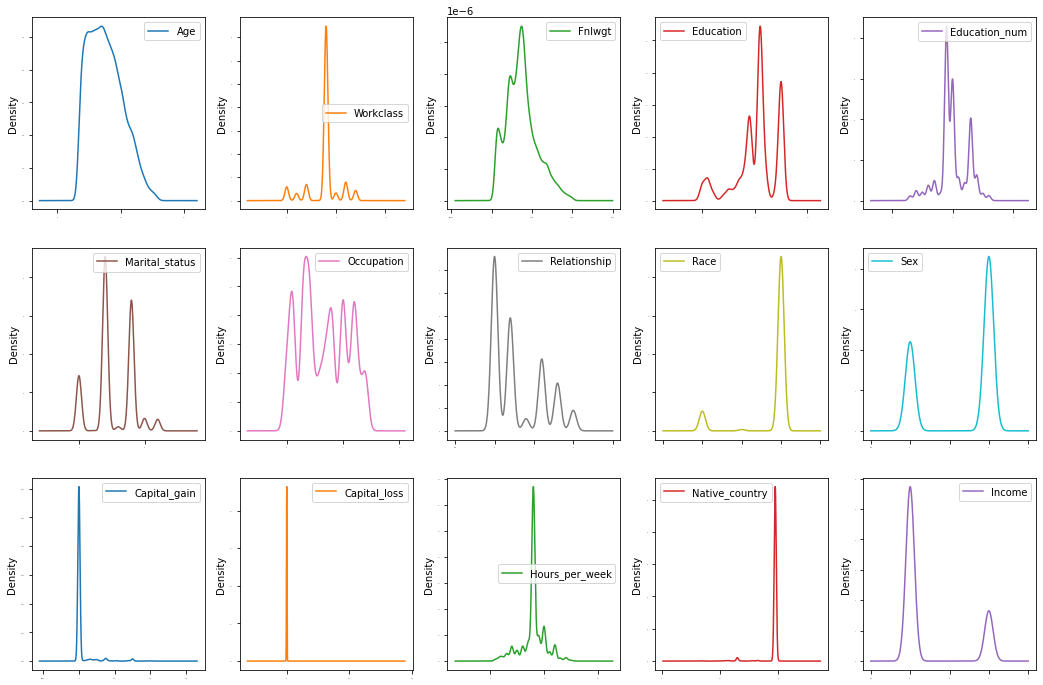

In [29]:
#show skewness using the plot
income_new.plot(kind='density', subplots=True, layout=(3,5), sharex= False, legend= True, fontsize=1, figsize=(18,12))
plt.show()

#we can see the skewness in columns : education, occupation , relationship etc

In [30]:
#Separating Input & output variables
income_new.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0


In [31]:
income_new.shape

(27417, 15)

In [32]:
x= income_new.iloc[:,0:14]
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39
5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23


In [33]:
y= income_new.iloc[:,14:]
y.head()

,Income
0,0
1,0
2,0
4,0
5,0


C:\Users\kirti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

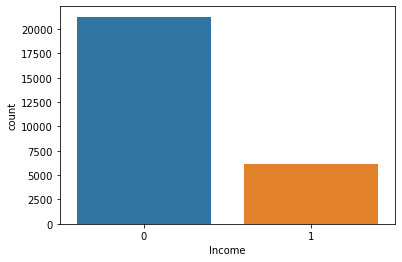

In [34]:
#data balancing
sns.countplot(income_new['Income'])

#data is not balanced, <50k = 0 has more entires than > 50k = 1

In [35]:
#target data is not balanced hence performing data balancing
import sklearn

In [36]:
#checking sklearn version
sklearn.__version__

'1.0.2'

In [37]:
pip install --user imblearn

Note: you may need to restart the kernel to use updated packages.


In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
smt = SMOTE()
x, y= smt.fit_resample(x, y)

In [39]:
x.value_counts()

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country
30   2          235271  9          13             2               11          0             4     1    0             0             40              39                4
37   4          208358  11         9              2               3           0             4     1    0             0             40              39                4
33   4          117963  9          13             2               3           0             4     1    0             0             40              39                4
29   4          195283  10         15             0               9           0             4     0    0             0             59              39                3
40   2          202872  11         12             2               10          5             4     0    0             0             40              39                3
   

In [40]:
y.value_counts()

#the responses are same now

Income
0         21279
1         21279
dtype: int64

In [41]:
y

# less than 50k = 0
#  More than 50k = 1

,Income
0,0
1,0
2,0
3,0
4,0
...,...
42553,1
42554,1
42555,1
42556,1


In [42]:
##removing the skewness
from sklearn.preprocessing import power_transform
#doing power transform
x=power_transform(x, method='yeo-johnson')
x

array([[ 0.83467427,  1.8397098 , -1.12955933, ..., -0.03531164,
        -2.43773518,  0.16962487],
       [-0.10752477,  0.07391972,  0.42203644, ..., -0.03531164,
        -0.20682356,  0.16962487],
       [ 1.05541252,  0.07391972,  0.6040831 , ..., -0.03531164,
        -0.20682356,  0.16962487],
       ...,
       [-0.10752477,  0.07391972, -0.46912726, ..., -0.03531164,
         0.09555153,  0.16962487],
       [ 1.19978029, -1.35428775, -0.85753114, ..., -0.03531164,
         0.09555153,  0.16962487],
       [ 0.21829057,  0.07391972,  0.36872394, ..., -0.03531164,
         1.05572399,  0.16962487]])

In [43]:
#performing data scaling 
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x= scale.fit_transform(x)

In [44]:
from sklearn.preprocessing import MinMaxScaler
scale= MinMaxScaler()
scaled=scale.fit_transform(x)
x=scaled
x

array([[0.60152294, 0.67087971, 0.24674022, ..., 0.        , 0.06715103,
        0.16068323],
       [0.40975054, 0.38760567, 0.55129271, ..., 0.        , 0.38597693,
        0.16068323],
       [0.64645135, 0.38760567, 0.58702544, ..., 0.        , 0.38597693,
        0.16068323],
       ...,
       [0.40975054, 0.38760567, 0.37637207, ..., 0.        , 0.42919021,
        0.16068323],
       [0.67583554, 0.15848778, 0.30013484, ..., 0.        , 0.42919021,
        0.16068323],
       [0.47606603, 0.38760567, 0.54082835, ..., 0.        , 0.56641117,
        0.16068323]])

In [45]:
#number of columns
x.shape[1] 

14

In [46]:
#checking the multicollieanrity
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
#finding vif for each column
def calc_vif(x):
    vif= pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF Factor']= [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif)

In [48]:
x.shape

(42558, 14)

In [49]:
calc_vif(income_new)

#there is high multicolinearity in columns :
#Education_num
#Race
#Hours_per_week
#Native_country


#to remove the multicolinearity in various columns , instead of dropping the columns, we can use PCA

,variables,VIF Factor
0,Age,10.264526
1,Workclass,8.735638
2,Fnlwgt,4.704827
3,Education,9.296805
4,Education_num,24.165478
5,Marital_status,4.326983
6,Occupation,3.673224
7,Relationship,2.917581
8,Race,37.335243
9,Sex,4.545871


In [50]:
#clubbing the columns to 12 total- clubbing pair of columns with high colinearity 
from sklearn.decomposition import PCA
pca= PCA(n_components = 12)
xpca=pca.fit_transform(x)
x=xpca

In [51]:
x=pd.DataFrame(x)
x.shape

(42558, 12)

In [52]:
y.shape

(42558, 1)

# Model Building - Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
lr= LogisticRegression()

In [56]:
#finding the best accuracy
best_accuracy=0
best_rs= 0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state=i)
    lr= LogisticRegression()
    lr.fit(x_train, y_train)
    pred_test= lr.predict(x_test)
    accuracy= accuracy_score(y_test, pred_test)
    if accuracy>best_accuracy:
        best_accuracy=accuracy
        best_rs=i
print("Best Accuracy is ", best_accuracy, "on random state ", best_rs)

#the best accuracy found at random state = 74

Best Accuracy is  0.7899436090225563 on random state  74


In [57]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=.20, random_state= 74)
lr.fit(x_train, y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)

In [58]:
from sklearn.metrics import classification_report
print("accuracy score:", accuracy_score(y_test, pred_test))
print(classification_report(y_test, pred_test))
#so at random state 975, the support tells the number of rows with 0 and 1 target variable, accuracy is 0.54 is not good

accuracy score: 0.7899436090225563
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      4251
           1       0.78      0.82      0.80      4261

    accuracy                           0.79      8512
   macro avg       0.79      0.79      0.79      8512
weighted avg       0.79      0.79      0.79      8512



In [60]:
#The model accuracy is 79 %

Cross Validating

In [61]:
#in this data is divided into 'n' folds for training and 1 fold goes for test
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test, pred_test)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv: ", j)
    print("Cross validation is ", lsc*100)
    print("accuracy score is ", lss*100)
    print("\n")


At cv:  2
Cross validation is  77.73156633300438
accuracy score is  78.99436090225564


At cv:  3
Cross validation is  77.64697589172425
accuracy score is  78.99436090225564


At cv:  4
Cross validation is  77.76685470431885
accuracy score is  78.99436090225564


At cv:  5
Cross validation is  77.84909571911804
accuracy score is  78.99436090225564


At cv:  6
Cross validation is  77.86315146388458
accuracy score is  78.99436090225564


At cv:  7
Cross validation is  77.85849140761923
accuracy score is  78.99436090225564


At cv:  8
Cross validation is  77.87024756617997
accuracy score is  78.99436090225564


At cv:  9
Cross validation is  77.90550676125211
accuracy score is  78.99436090225564




In [63]:
#since the most matching value is at cv= 9, we take it
lsscore_selected= cross_val_score(lr,x,y,cv= 9).mean()
print("the cv score is:", lsscore_selected, "the accuracy score is: ", lss)

the cv score is: 0.7790550676125212 the accuracy score is:  0.7899436090225563


AUC- ROC Curve

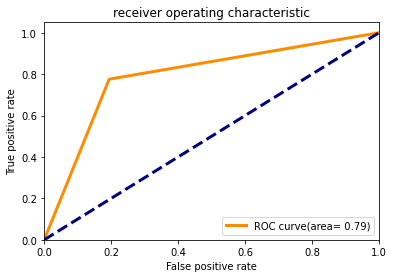

In [64]:
#plotting model performance
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve (pred_test, y_test)
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw=3, label= 'ROC curve(area= %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [65]:
#roc area shows that the accuracy is 79%. There are some values in false positive & false negative that reduce the accuracy

Saving the model

In [67]:
#saving Data Frame
project_cen=pd.DataFrame(pred_test)
project_cen.to_csv("poject_cen.csv")

In [68]:
#saving model
import pickle

file_cen = 'poject_cen.pkl'
pickle.dump(lr, open(file_cen, 'wb'))

In [69]:
#load model from disk
model_lr = pickle.load(open(file_cen, 'rb'))

In [70]:
#model prediction
result_lr = model_lr.score(x_test, y_test)
print(result_lr)

#Prediction is correct upto 78.99%

0.7899436090225563


# Conclusion

The model shows the accuracy of 78.9% which can be taken as fair accuracy.

In [74]:
#predict 'income' by giving inputs- 

t= np.array([36, 44, 10, 789,89,54,78,90,87,89,1, 67])

In [75]:
t.shape

(12,)

In [76]:
t=t.reshape(1,-1)

In [77]:
t.shape

(1, 12)

In [78]:
lr.predict(t)

# Yes - 1
# No -0

#For the given data, income is <= 50k

array([0])

In [103]:
#predict 'income' by giving inputs- 

t= np.array([6890, 667,890,458,21,384,5,6,788,45,67, 78899])

In [104]:
t.shape

(12,)

In [105]:
t=t.reshape(1,-1)

In [106]:
lr.predict(t)

array([1])

For the given values of the data, it says that income is >50k ie Yes =1